291


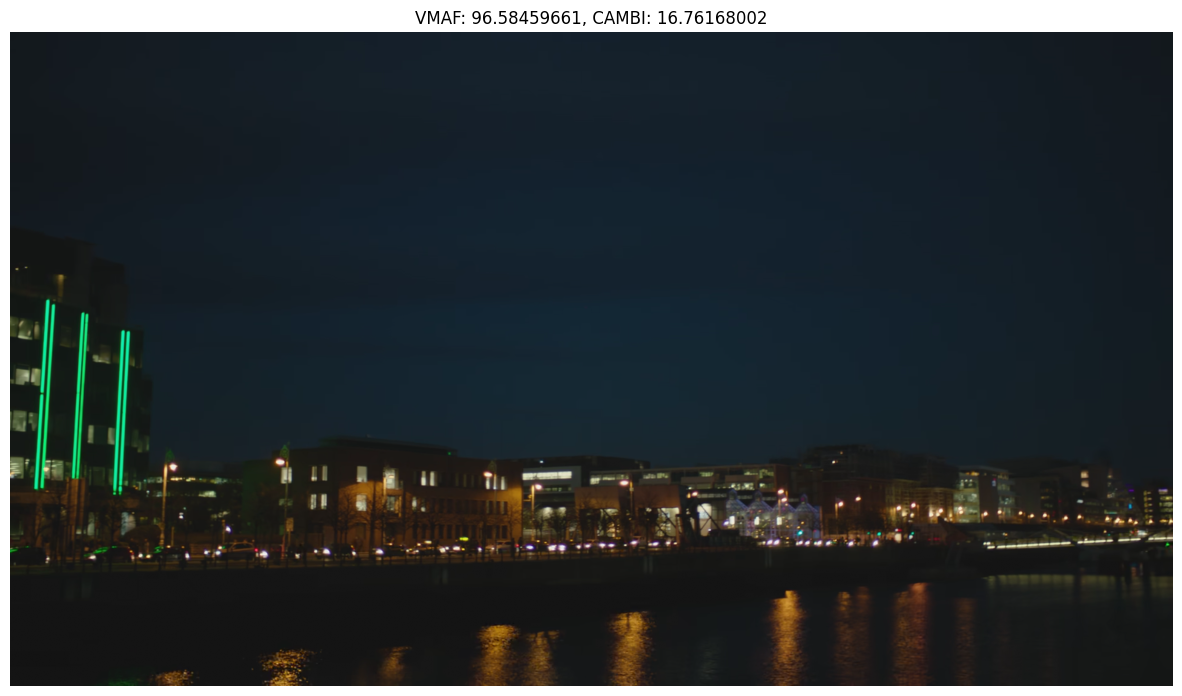

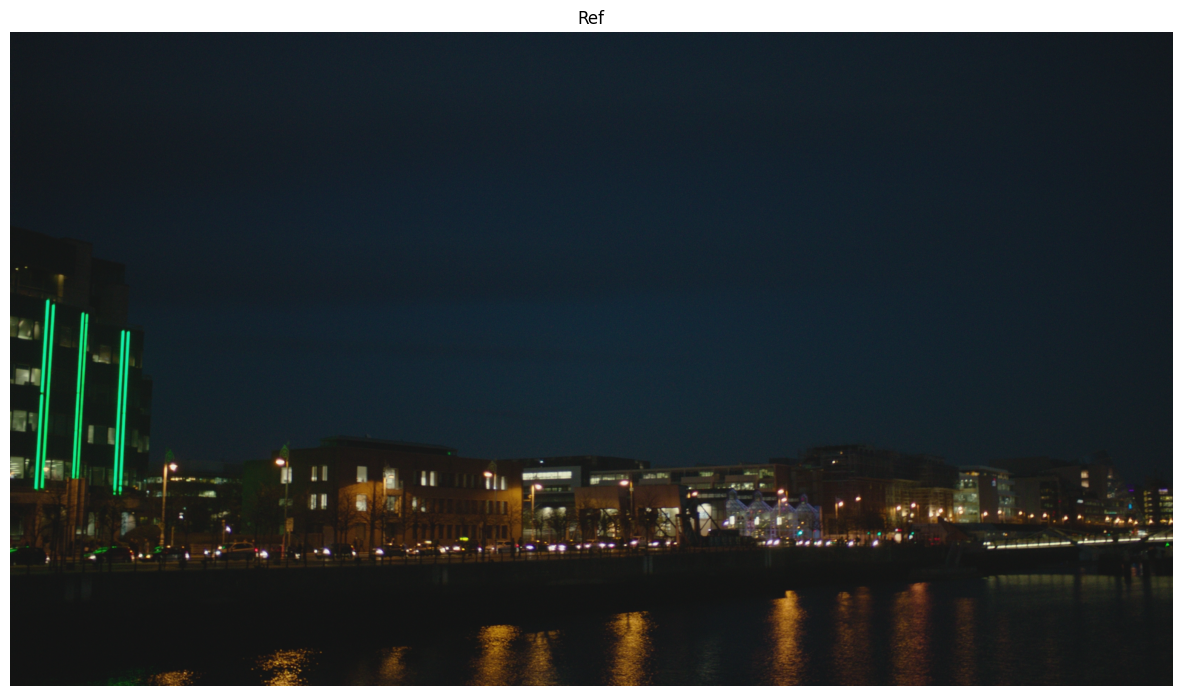

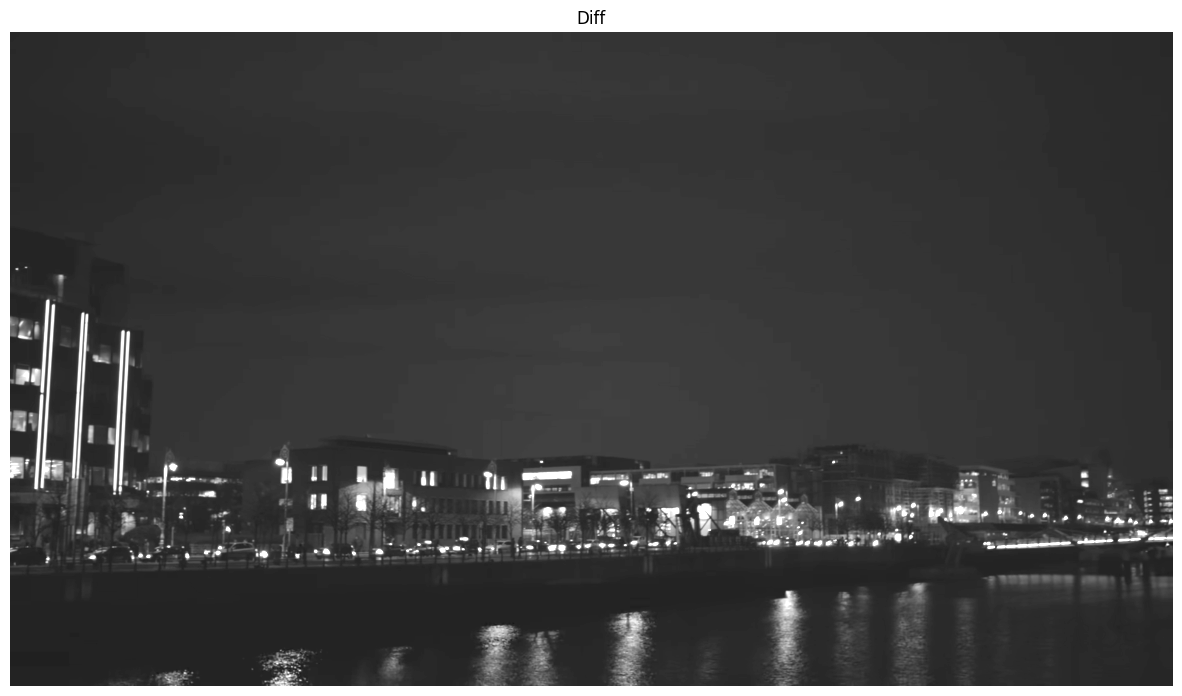

In [11]:
import pandas as pd 
from library import readYUV420, YUV2RGB, readYUV420Range
import matplotlib.pyplot as plt 
import os 
import numpy as np
import random
from scipy import ndimage

refPath = '/home/nwaliv/bandon/ramsookd/data/rawVideos'
compPath = '/home/nwaliv/bandon/nwaliv/trainVideoSet'

vmaf_lim = 75
cambi_lim = 10
df = pd.read_csv('dataFrames/trainVideoSet.csv')
df = df[df['VMAF'] >= vmaf_lim]
df = df[df['CAMBI'] >= cambi_lim]
print(df.shape[0])
_row = df.sample(n=1,replace=False).to_dict(orient='records')[0]

_frame = random.randint(0, _row['NumFrames']-1)

Ycomp,Ucomp,Vcomp = readYUV420Range(os.path.join(compPath, _row['Comp']), (_row['Width'], _row['Height']), (_frame, _frame), True)
YUV = np.stack([Ycomp,Ucomp,Vcomp], -1)
RGB = YUV2RGB(YUV)[0]/255

Y,U,V = readYUV420Range(os.path.join(refPath, _row['Ref']), (_row['Width'], _row['Height']), (_frame, _frame), True)
YUV = np.stack([Y,U,V], -1)
RGBRef = YUV2RGB(YUV)[0]/255

_diff = (Ycomp[0]/255)*1.75

plt.figure(figsize=(15,15), dpi=100)
plt.imshow(RGB)
plt.title(f"VMAF: {_row['VMAF']}, CAMBI: {_row['CAMBI']}")
plt.axis('off')
plt.show()


plt.figure(figsize=(15,15), dpi=100)
plt.imshow(RGBRef)
plt.title(f"Ref")
plt.axis('off')
plt.show()


plt.figure(figsize=(15,15), dpi=100)
plt.imshow(_diff, vmin=0, vmax=1, cmap='gray')
plt.title(f"Diff")
plt.axis('off')
plt.show()